In [ ]:
## Other references: 
## https://www.kaggle.com/startupsci/titanic-data-science-solutions
## https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
## https://www.kaggle.com/omarelgabry/a-journey-through-titanic

In [312]:
import os
#os.chdir("D:\\workspace\\git\\Kaggle\\Titanic-Prediction-Practice")
os.getcwd()

'D:\\workspace\\git\\Python_Practice'

In [313]:
%pylab  inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


D:\wjhong\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [314]:
import re
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [315]:
train = pd.read_csv("D:\\workspace\\git\\Kaggle\\Titanic-Prediction-Practice/input/train.csv")
test  = pd.read_csv("D:\\workspace\\git\\Kaggle\\Titanic-Prediction-Practice/input/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [316]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [317]:
test["Survived"] = np.nan
train["memo"] = "train"
test["memo"] = "test"
total = train.append(test)

In [318]:
total["FamilySize"] = total["Parch"] + total["SibSp"] + 1
total["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [319]:
p = re.compile(', (.+)\.')
p.findall(str(total["Name"][:1]))

['Mr']

In [320]:
total["Title"] = total['Name'].str.findall(r', ([^(]+)\.')
total["Title"] = total["Title"].apply(pd.Series)

In [321]:
total["Title"].apply(pd.Series).stack().value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Dona              1
Don               1
Sir               1
Jonkheer          1
Lady              1
Capt              1
the Countess      1
dtype: int64

In [322]:
total.Title[(total.Title=="Mlle") | (total.Title=="Ms")] = "Miss"
total.Title[(total.Title=="Mme") | (total.Title=="the Countess")] = "Mrs"
total["Mother"] = 0

D:\wjhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\wjhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [323]:
total["Mother"][(total.Sex=='female') & (total.Parch>0) & (total.Age>18) & (total.Title!='Miss')] = 1
total["Title"].apply(pd.Series).stack().value_counts()

D:\wjhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Mr          757
Miss        264
Mrs         199
Master       61
Dr            8
Rev           8
Col           4
Major         2
Lady          1
Jonkheer      1
Sir           1
Dona          1
Don           1
Capt          1
dtype: int64

In [324]:
#total.FamilySize[total.Title=="Dona"]
#unique(total.FamilySize[total.Title=="Lady"])
total.Title[total.Title=="Dona"] = "Miss"

D:\wjhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [325]:
from collections import Counter
rare_title = ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
combined = '\t'.join(rare_title)
Counter([x in combined for x in total.Title])
#len(total.Title)

Counter({False: 1282, True: 27})

In [326]:
total.Title[[x in combined for x in total.Title]]  = 'Rare Title'

D:\wjhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [327]:
total["Title"].apply(pd.Series).stack().value_counts()

Mr            757
Miss          265
Mrs           199
Master         61
Rare Title     27
dtype: int64

In [328]:
total["Child"] = 0
total.Child[(total.Parch>0) & (total.Age<=18)] = 1
total.Child.apply(pd.Series).stack().value_counts()

D:\wjhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    1187
1     122
dtype: int64

In [329]:
total["FamilySize"].apply(pd.Series).stack().value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
dtype: int64

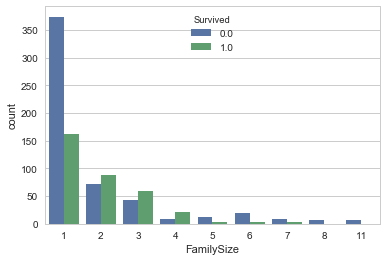

In [330]:
sns.countplot(x='FamilySize', hue="Survived", data=total)

In [331]:
total["FamilySizeD"] = ""
total.FamilySizeD[total.FamilySize == 1] = 'singleton'
total.FamilySizeD[(total.FamilySize <= 4) & (total.FamilySize > 1)] = 'small'
total.FamilySizeD[total.FamilySize > 4] = 'large'

D:\wjhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\wjhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\wjhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [332]:
total.FamilySizeD.apply(pd.Series).stack().value_counts()

singleton    790
small        437
large         82
dtype: int64

(<matplotlib.figure.Figure at 0x17c22160>,
 OrderedDict([(('small', '0.0'),
               (0.0, 0.0, 0.3244768921336578, 0.41983343193919809)),
              (('small', '1.0'),
               (0.0,
                0.42315569107541073,
                0.3244768921336578,
                0.57684430892458916)),
              (('singleton', '0.0'),
               (0.3294273871831628,
                0.0,
                0.5967263393005967,
                0.6941479982924702)),
              (('singleton', '1.0'),
               (0.3294273871831628,
                0.69747025742868274,
                0.5967263393005967,
                0.30252974257131715)),
              (('large', '0.0'),
               (0.9311042215332644,
                0.0,
                0.06889577846673557,
                0.83592326653091842)),
              (('large', '1.0'),
               (0.9311042215332644,
                0.83924552566713095,
                0.06889577846673557,
                0.160754474

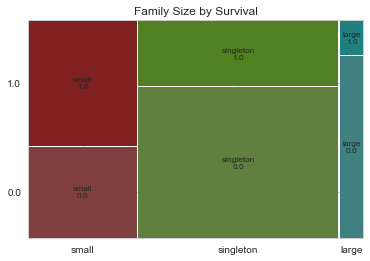

In [333]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(total, ['FamilySizeD', 'Survived'], title = "Family Size by Survival")

In [334]:
total.shape

(1309, 18)

In [335]:
variable_names = ['Cabin', 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','FamilySize','Mother','Child','FamilySizeD']
##Find out which col has NA values.
total['Survived'].isnull().sum()

418

In [336]:
def count_na(x):
    return x.isnull().sum()
tmp = total.apply(count_na, axis=0)
tmp = tmp.index[tmp>0]
tmp = np.array(tmp)
tmp

array(['Age', 'Cabin', 'Embarked', 'Fare', 'Survived'], dtype=object)

In [337]:
tmp = np.setdiff1d(tmp, "Survived")
print("TRUE : ", tmp[[x in variable_names for x in tmp]])
print("FALSE : ", tmp[[x not in variable_names for x in tmp]])

TRUE :  ['Age' 'Cabin' 'Embarked' 'Fare']
FALSE :  []


In [338]:
total.Cabin.apply(pd.Series).stack().value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
F33                4
C78                4
D                  4
F2                 4
C22 C26            4
B96 B98            4
A34                3
B58 B60            3
B51 B53 B55        3
C101               3
E34                3
E101               3
B5                 2
B20                2
C123               2
D21                2
C68                2
C7                 2
D37                2
E44                2
D30                2
E8                 2
E31                2
C125               2
E33                2
C2                 2
                  ..
A32                1
D7                 1
D11                1
F                  1
C90                1
D40                1
A7                 1
A26                1
D50                1
E12                1
C49                1
C87                1
T                  1
C128               1
A14                1
E68                1
E58          

In [339]:
import re
total["ttl_Cabin"] = total["Cabin"]
total["Cabin"] = total["Cabin"].str.replace(r'[0-9]', '').str[:1]
total["Cabin"].apply(pd.Series).stack().value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
dtype: int64

In [340]:
which = lambda lst:list(np.where(lst)[0])
which(total.Embarked.isnull())

[61, 829]

In [341]:
#df['col_name'] = df['col_name'].astype('category')
total['Pclass'] = total['Pclass'].astype('category')

In [342]:
total[["Fare"]].iloc[[61,829]]

,Fare
61,80.0
829,80.0


In [343]:
total[["Fare"]].iloc[[61,829]].values

array([[ 80.],
       [ 80.]])

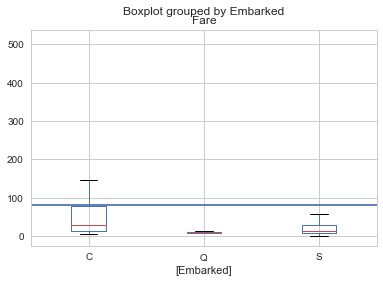

In [344]:
embark_fare =  total[(total.PassengerId != 62) & (total.PassengerId != 830)]

#plt.boxplot(total[["Embarked", "Fare"]])
#total[["Embarked", "Fare"]].boxplot()
total[["Embarked", "Fare"]].boxplot(by = "Embarked")
plt.axhline(y=80)#, xmin=0, xmax=1, hold=None)

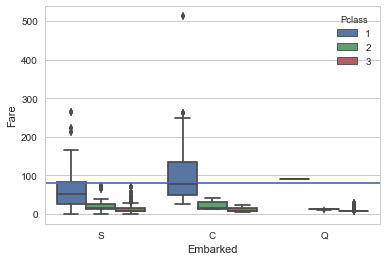

In [345]:
#total[["Embarked", "Fare"]].boxplot(by = "Embarked")
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=total)
plt.axhline(y=80)

In [346]:
i = which(tmp=="Embarked")
tmp[i]
str2eval = ["total", tmp[i]]
eval(''.join(map(str,str2eval)))
total[list(set(variable_names) - set(tmp))].columns

Index(['Title', 'Parch', 'Child', 'FamilySize', 'SibSp', 'FamilySizeD',
       'Mother', 'Sex', 'Pclass'],
      dtype='object')

In [347]:
from sklearn import preprocessing
total[list(set(variable_names) - set(tmp))] = total[list(set(variable_names) - set(tmp))].apply(preprocessing.LabelEncoder().fit_transform)
#le = preprocessing.LabelEncoder()
#for i in range(len(total[list(set(variable_names) - set(tmp))].columns)):
 #   total[list(set(variable_names) - set(tmp))].iloc[:,i] = le.fit_transform(total[list(set(variable_names) - set(tmp))].iloc[:,i])

In [348]:
total[list(set(variable_names) - set(tmp))].isnull().values.any()

False

In [349]:
''.join(map(str,str2eval))

"total['Embarked']"

In [350]:
total[list(set(variable_names) - set(tmp))].loc[eval(''.join(map(str,str2eval))).notnull()]

,Title,Parch,Child,FamilySize,SibSp,FamilySizeD,Mother,Sex,Pclass
0,2,0,0,1,1,2,0,1,2
1,3,0,0,1,1,2,0,0,0
2,1,0,0,0,0,1,0,0,2
3,3,0,0,1,1,2,0,0,0
4,2,0,0,0,0,1,0,1,2
5,2,0,0,0,0,1,0,1,2
6,2,0,0,0,0,1,0,1,0
7,0,1,1,4,3,0,0,1,2
8,3,2,0,2,0,2,1,0,2
9,3,0,0,1,1,2,0,0,1


In [351]:
eval(''.join(map(str,str2eval)))[eval(''.join(map(str,str2eval))).notnull()]

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
388    Q
389    S
390    S
391    S
392    S
393    S
394    S
395    S
396    Q
397    C
398    S
399    Q
400    S
401    S
402    C
403    S
404    C
405    C
406    S
407    C
408    Q
409    S
410    Q
411    Q
412    S
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 1307, dtype: object

In [352]:
Counter(eval(''.join(map(str,str2eval))))

Counter({'S': 914, 'C': 270, 'Q': 123, nan: 2})

In [353]:
random_forest = RandomForestClassifier(n_estimators=2000)
random_forest.fit(total[list(set(variable_names) - set(tmp))].loc[eval(''.join(map(str,str2eval))).notnull()], 
                    eval(''.join(map(str,str2eval)))[eval(''.join(map(str,str2eval))).notnull()])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [354]:
tmp_pred = random_forest.predict(total[list(set(variable_names) - set(tmp))].loc[eval(''.join(map(str,str2eval))).isnull()])
tmp_pred
## Same result as the boxplot

array(['C', 'C'], dtype=object)

In [355]:
eval(''.join(map(str,str2eval)))[eval(''.join(map(str,str2eval))).isnull()] = tmp_pred

D:\wjhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [356]:
which(eval(''.join(map(str,str2eval))).isnull().values==True)

[]

In [357]:
total.iloc[1043]

Age                          60.5
Cabin                         NaN
Embarked                        S
Fare                          NaN
Name           Storey, Mr. Thomas
Parch                           0
PassengerId                  1044
Pclass                          2
Sex                             1
SibSp                           0
Survived                      NaN
Ticket                       3701
memo                         test
FamilySize                      0
Title                           2
Mother                          0
Child                           0
FamilySizeD                     1
ttl_Cabin                     NaN
Name: 152, dtype: object

In [358]:
median(np.array(total.loc[(total.Pclass == 2) & (total.Embarked == 'S')]["Fare"])[~np.isnan(np.array(total.loc[(total.Pclass == 2) & (total.Embarked == 'S')]["Fare"]))]),

(8.0500000000000007,)

D:\wjhong\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
D:\wjhong\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


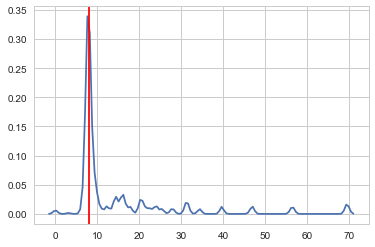

In [359]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(total.loc[(total.Pclass == 2) & (total.Embarked == 'S')]["Fare"]), bw=0.5)
plt.axvline(x=median(np.array(total.loc[(total.Pclass == 2) & (total.Embarked == 'S')]["Fare"])[~np.isnan(np.array(total.loc[(total.Pclass == 2) & (total.Embarked == 'S')]["Fare"]))]), color='r')

In [360]:
tmp = np.setdiff1d(tmp,"Embarked")
i = which(tmp=="Fare")
tmp

array(['Age', 'Cabin', 'Fare'], dtype=object)

In [361]:
str2eval = ["total", tmp[i]]
eval(''.join(map(str,str2eval)))
total[list(set(variable_names) - set(tmp))].columns

Index(['Embarked', 'Title', 'Parch', 'Child', 'FamilySize', 'SibSp',
       'FamilySizeD', 'Mother', 'Sex', 'Pclass'],
      dtype='object')

In [362]:
total[list(set(variable_names) - set(tmp))].loc[eval(''.join(map(str,str2eval))).notnull()]
eval(''.join(map(str,str2eval)))[eval(''.join(map(str,str2eval))).notnull()]

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
388      7.7500
389     21.0750
390     93.5000
391     39.4000
392     20.2500
393     10.5000
394     22.0250
395     60.0000
396      7.2500
397     79.2000
398      7.7750
399      7.7333
400    164.8667
401     21.0000
402     59.4000
403     47.1000
404     27.7208
405     13.8625
406     10.5000
407    211.5000
408      7.7208
409     13.7750
410      7.7500
411     90.0000
412      7.7750
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 1308

In [363]:
total[list(set(variable_names) - set(tmp))].loc[eval(''.join(map(str,str2eval))).notnull()].apply(preprocessing.LabelEncoder().fit_transform)

,Embarked,Title,Parch,Child,FamilySize,SibSp,FamilySizeD,Mother,Sex,Pclass
0,2,2,0,0,1,1,2,0,1,2
1,0,3,0,0,1,1,2,0,0,0
2,2,1,0,0,0,0,1,0,0,2
3,2,3,0,0,1,1,2,0,0,0
4,2,2,0,0,0,0,1,0,1,2
5,1,2,0,0,0,0,1,0,1,2
6,2,2,0,0,0,0,1,0,1,0
7,2,0,1,1,4,3,0,0,1,2
8,2,3,2,0,2,0,2,1,0,2
9,0,3,0,0,1,1,2,0,0,1


In [364]:
random_forest = RandomForestRegressor(n_estimators=2000)
random_forest.fit(total[list(set(variable_names) - set(tmp))].loc[eval(''.join(map(str,str2eval))).notnull()].apply(preprocessing.LabelEncoder().fit_transform), 
                    eval(''.join(map(str,str2eval)))[eval(''.join(map(str,str2eval))).notnull()])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [365]:
tmp_pred = random_forest.predict(total[list(set(variable_names) - set(tmp))].loc[eval(''.join(map(str,str2eval))).isnull()].apply(preprocessing.LabelEncoder().fit_transform))
tmp_pred
## .... what have I done...

array([ 185.9227856])

D:\wjhong\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
D:\wjhong\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


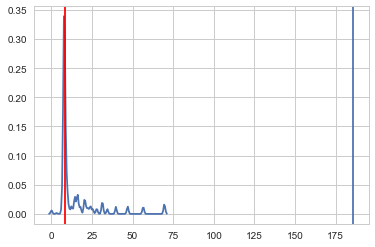

In [377]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(total.loc[(total.Pclass == 2) & (total.Embarked == 'S')]["Fare"]), bw=0.5)
plt.axvline(x=median(np.array(total.loc[(total.Pclass == 2) & (total.Embarked == 'S')]["Fare"])[~np.isnan(np.array(total.loc[(total.Pclass == 2) & (total.Embarked == 'S')]["Fare"]))]), color='r')
plt.axvline(x=tmp_pred)## .... what have I done...

In [378]:
median(np.array(total.loc[(total.Pclass == 2) & (total.Embarked == 'S')]["Fare"])[~np.isnan(np.array(total.loc[(total.Pclass == 2) & (total.Embarked == 'S')]["Fare"]))])

8.0500000000000007

In [380]:
eval(''.join(map(str,str2eval)))[eval(''.join(map(str,str2eval))).isnull()] =median(np.array(total.loc[(total.Pclass == 2) & (total.Embarked == 'S')]["Fare"])[~np.isnan(np.array(total.loc[(total.Pclass == 2) & (total.Embarked == 'S')]["Fare"]))])

D:\wjhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [435]:
tmp = np.setdiff1d(tmp,"Fare")
i = which(tmp=="Age")
tmp

str2eval = ["total", tmp[i]]
eval(''.join(map(str,str2eval)))
total[list(set(variable_names) - set(tmp))].columns

total[list(set(variable_names) - set(tmp))].loc[eval(''.join(map(str,str2eval))).notnull()]
eval(''.join(map(str,str2eval)))[eval(''.join(map(str,str2eval))).notnull()]

total[list(set(variable_names) - set(tmp))].loc[eval(''.join(map(str,str2eval))).notnull()].apply(preprocessing.LabelEncoder().fit_transform)

random_forest = RandomForestRegressor(n_estimators=2000)
random_forest.fit(total[list(set(variable_names) - set(tmp))].loc[eval(''.join(map(str,str2eval))).notnull()].apply(preprocessing.LabelEncoder().fit_transform), 
                    eval(''.join(map(str,str2eval)))[eval(''.join(map(str,str2eval))).notnull()])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [436]:
ttl_pred = random_forest.predict(total[list(set(variable_names) - set(tmp))].loc[eval(''.join(map(str,str2eval))).notnull()].apply(preprocessing.LabelEncoder().fit_transform))

In [437]:
total['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [438]:
pd.DataFrame(ttl_pred).describe()

,0
count,1046.000000
mean,29.864344
std,11.657653
min,1.210320
25%,23.992030
50%,30.369615
75%,36.447430
max,63.338792


(array([  72.,   62.,  274.,  513.,  161.,  108.,   65.,   41.,   10.,    3.]),
 array([  0.17 ,   8.153,  16.136,  24.119,  32.102,  40.085,  48.068,
         56.051,  64.034,  72.017,  80.   ]),
 <a list of 10 Patch objects>)

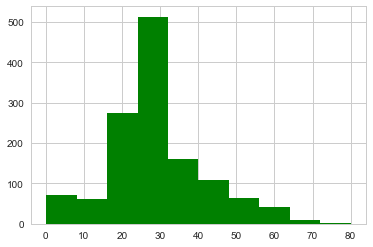

In [487]:
plt.hist(total.groupby(['Child', 'Mother']).transform(lambda x: x.fillna(x.median())).loc[:, 'Age'], color = "green")

(array([ 0.05500382,  0.0473644 ,  0.20932009,  0.39190222,  0.12299465,
         0.08250573,  0.04965623,  0.03132162,  0.00763942,  0.00229183]),
 array([  0.17 ,   8.153,  16.136,  24.119,  32.102,  40.085,  48.068,
         56.051,  64.034,  72.017,  80.   ]),
 <a list of 10 Patch objects>)

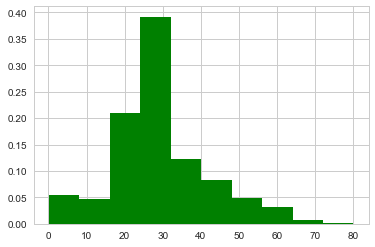

In [488]:
tmp = total.groupby(['Child', 'Mother']).transform(lambda x: x.fillna(x.median())).loc[:, 'Age']
plt.hist(tmp, color = "green",weights = np.ones_like(tmp) / (len(tmp)))

In [461]:
total[list(set(variable_names) - set(tmp))].loc[eval(''.join(map(str,str2eval))).isnull()].describe()

,Title,Child,FamilySize,SibSp,FamilySizeD,Pclass,Parch,Fare,Mother,Sex
count,263.000000,263.0,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.0,263.000000
mean,1.855513,0.0,0.650190,0.422053,1.125475,1.642586,0.228137,19.823319,0.0,0.703422
std,0.643551,0.0,1.673568,1.139425,0.473977,0.726812,0.815667,27.550667,0.0,0.457620
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.000000,0.0,0.000000,0.000000,1.000000,2.000000,0.000000,7.750000,0.0,0.000000
50%,2.000000,0.0,0.000000,0.000000,1.000000,2.000000,0.000000,8.050000,0.0,1.000000
75%,2.000000,0.0,0.000000,0.000000,1.000000,2.000000,0.000000,22.804150,0.0,1.000000
max,4.000000,0.0,8.000000,6.000000,2.000000,2.000000,7.000000,227.525000,0.0,1.000000


In [ ]:
age_avg = total['Age'].mean()
age_std = total['Age'].std()
age_null_count = total['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

#total['Age'][np.isnan(total['Age'])] = age_null_random_list
#total['Age'] = total['Age'].astype(int)

In [479]:
pd.DataFrame(list(age_null_random_list)+ list(total['Age'].dropna())).describe()

,0
count,1309.000000
mean,29.545966
std,13.393093
min,0.170000
25%,21.000000
50%,28.000000
75%,37.000000
max,80.000000


In [ ]:
total["Age"].describe()

(array([  72.,   83.,  346.,  330.,  232.,  127.,   65.,   41.,   10.,    3.]),
 array([  0.17 ,   8.153,  16.136,  24.119,  32.102,  40.085,  48.068,
         56.051,  64.034,  72.017,  80.   ]),
 <a list of 10 Patch objects>)

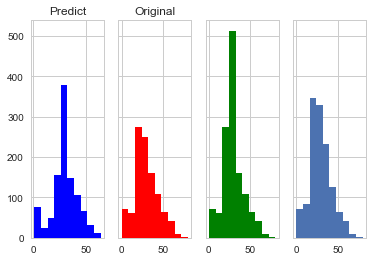

In [496]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
ax1.hist(ttl_pred, color = "blue")
ax1.set_title('Predict')
ax2.hist(total['Age'].dropna(), color = "red")
ax2.set_title('Original')
ax3.hist(total.groupby(['Child', 'Mother']).transform(lambda x: x.fillna(x.median())).loc[:, 'Age'], color = "green")
ax4.hist(list(age_null_random_list)+ list(total['Age'].dropna()))

In [502]:
eval(''.join(map(str,str2eval)))[eval(''.join(map(str,str2eval))).isnull()] = age_null_random_list

D:\wjhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [505]:
total.columns.values

array(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'memo',
       'FamilySize', 'Title', 'Mother', 'Child', 'FamilySizeD', 'ttl_Cabin'], dtype=object)

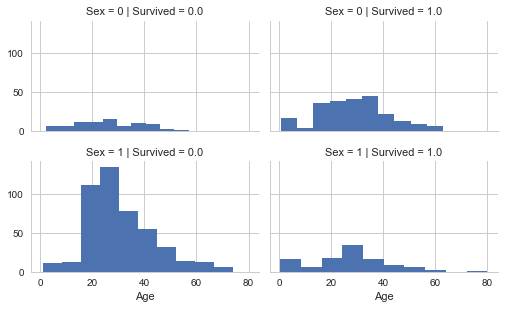

In [510]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(total.loc[total["memo"]=="train",], col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age')#, alpha=.5, bins=20)
grid.add_legend()

In [515]:
train = total.loc[total.memo=="train",]
test = total.loc[total.memo=="test",]
train.columns.values

array(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'memo',
       'FamilySize', 'Title', 'Mother', 'Child', 'FamilySizeD', 'ttl_Cabin'], dtype=object)

In [518]:
X_train = train[['Age','Fare', 'Pclass', 'Sex', 'SibSp', 'FamilySize', 'Title', 'Mother', 'Child']]
Y_train = train[['Survived']]
X_test = test[['Age','Fare', 'Pclass', 'Sex', 'SibSp', 'FamilySize', 'Title', 'Mother', 'Child']]
Y_test = test[['Survived']]

In [520]:
random_forest = RandomForestClassifier(n_estimators=2000)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

D:\wjhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


98.769999999999996

In [522]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

In [524]:
submission.to_csv('D:\\workspace\\git\\Kaggle\\Titanic-Prediction-Practice/output/python_submission.csv', index=False)